#Importing Libraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Heart_disease.csv")
data.shape

(1190, 12)

In [4]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


#Data Preprocessing

In [5]:
data["chest pain type"] = data["chest pain type"].astype(str).replace({"1":"typical angina",
                                                                       "2":"atypical angina",
                                                                       "3":"non-anginal pain",
                                                                       "4":"asymptomatic"
                                                                       })
data["resting ecg"] = data["resting ecg"].astype(str).replace({"0":"normal",
                                                               "1":"ST-T wave abnormality",
                                                               "2":"left ventricular hypertrophy"})
data["ST slope"] = data["ST slope"].astype(str).replace({"0":"normal",
                                                         "1":"upsloping",
                                                         "2":"flat",
                                                         "3":"downsloping"})
data["sex"] = data["sex"].astype(str).replace({"0":"Female",
                                               "1":"Male"})
data["fasting blood sugar"] = data["fasting blood sugar"].astype(str).replace({"0":"<120 mg/dl",
                                                                               "1":" >120 mg/dl"})
data["target"] = data["target"].astype(str).replace({"0":"No",
                                                     "1":"Yes"})

In [6]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,Male,atypical angina,140,289,<120 mg/dl,normal,172,0,0.0,upsloping,No
1,49,Female,non-anginal pain,160,180,<120 mg/dl,normal,156,0,1.0,flat,Yes
2,37,Male,atypical angina,130,283,<120 mg/dl,ST-T wave abnormality,98,0,0.0,upsloping,No
3,48,Female,asymptomatic,138,214,<120 mg/dl,normal,108,1,1.5,flat,Yes
4,54,Male,non-anginal pain,150,195,<120 mg/dl,normal,122,0,0.0,upsloping,No


In [7]:
data.shape

(1190, 12)

In [8]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   object 
 2   chest pain type      1190 non-null   object 
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   object 
 6   resting ecg          1190 non-null   object 
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   object 
 11  target               1190 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 111.7+ KB


In [10]:
data.describe()

,age,resting bp s,cholesterol,max heart rate,exercise angina,oldpeak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.387395,0.922773
std,9.358203,18.368823,101.420489,25.517636,0.487360,1.086337
min,28.000000,0.000000,0.000000,60.000000,0.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.000000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,1.000000,6.200000


In [11]:
data["target"].value_counts()

Yes    629
No     561
Name: target, dtype: int64

#Data Visualization of complete data

##Total number of positive and negative records


Text(0, 0.5, 'Number of Records in Each Class')

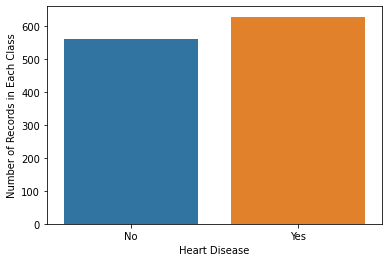

In [12]:
sns.countplot(x = data["target"])
plt.xlabel("Heart Disease")
plt.ylabel("Number of Records in Each Class")
#plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Heart_Disease_Pictures/Target_Label.png")

## Total number of records based on Chest Pain Type

Text(0.5, 1.0, 'Chest Pain Type Count Plot')

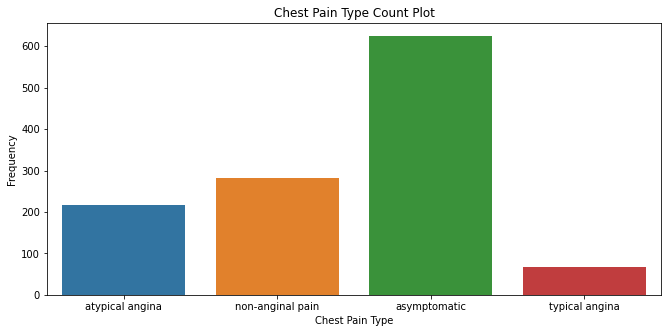

In [13]:
plt.figure(figsize = (11,5))
sns.countplot(x = data["chest pain type"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.title("Chest Pain Type Count Plot")
#plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Heart_Disease_Pictures/Chest_Pain_Type_Countplot.png")

## Total number of records based on Gender

Text(0, 0.5, 'Frequency')

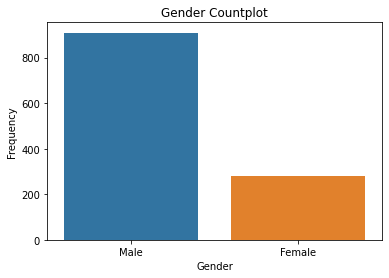

In [14]:
sns.countplot(x = data["sex"])
plt.title("Gender Countplot")
plt.xlabel("Gender")
plt.ylabel("Frequency")
#plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Heart_Disease_Pictures/Gender_Countplot.png")

#Dividing the dataset based on Target Variable

In [15]:
heart_disease = data[data["target"]== "Yes"]

In [16]:
no_heart_disease = data[data["target"] == "No"]

# Data Visualization of positive and negative records

##Distribution of Heart Disease Records based on Gender

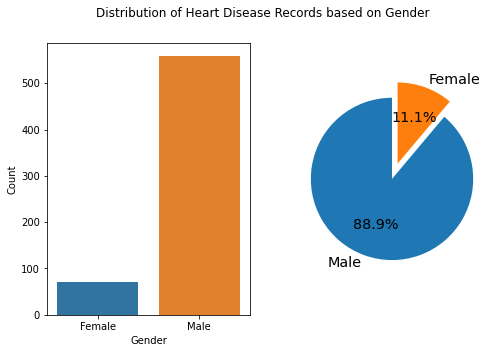

In [17]:
fig = plt.figure(figsize = (8,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

plt.subplot(1,2,1)
sns.countplot(x = heart_disease["sex"])
plt.xlabel("Gender")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = heart_disease["sex"].value_counts(), labels = ["Male","Female"],autopct='%1.1f%%', startangle=90,explode = [0.0,0.2],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Heart Disease Records based on Gender")
plt.show()

## Distribution of Non-Heart Disease Records based on Gender

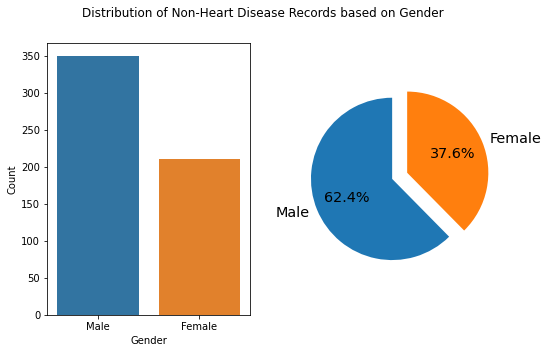

In [18]:
fig = plt.figure(figsize = (8,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

plt.subplot(1,2,1)
sns.countplot(x = no_heart_disease["sex"])
plt.xlabel("Gender")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = no_heart_disease["sex"].value_counts(), labels = ["Male","Female"],autopct='%1.1f%%', startangle=90,explode = [0.0,0.2],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Non-Heart Disease Records based on Gender")
plt.show()

## Distribution of Heart Disease Records based on Chest Pain Type

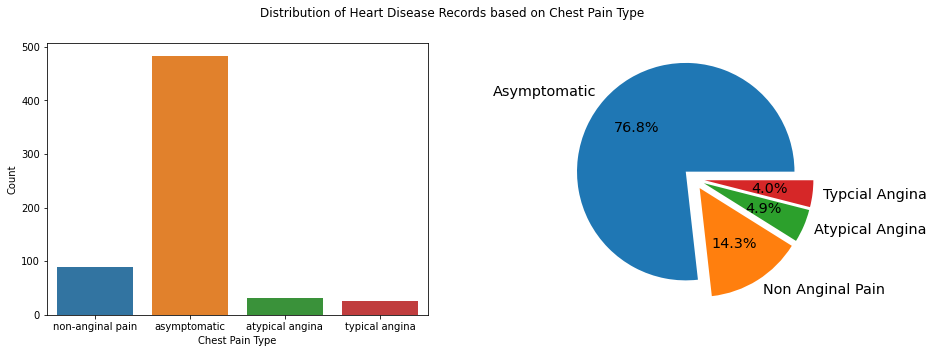

In [19]:
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

plt.subplot(1,2,1)

sns.countplot(x = heart_disease["chest pain type"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = heart_disease["chest pain type"].value_counts(), labels =["Asymptomatic","Non Anginal Pain","Atypical Angina","Typcial Angina"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Heart Disease Records based on Chest Pain Type")
plt.show()

## Distribution of Non-Heart Disease Records based on Chest Pain Type

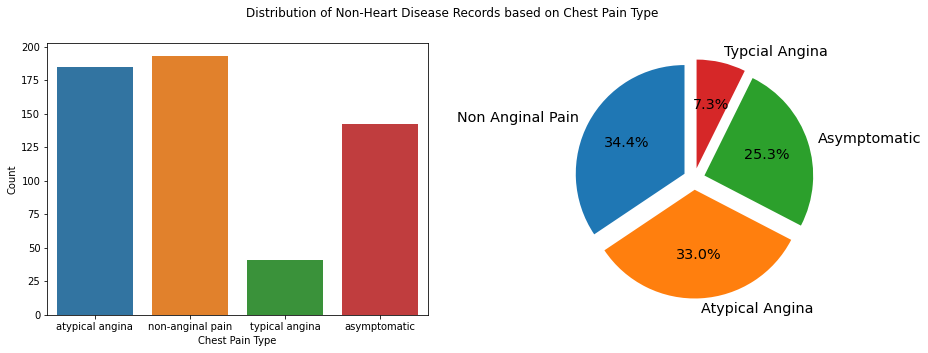

In [20]:
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

plt.subplot(1,2,1)
sns.countplot(x = no_heart_disease["chest pain type"])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = no_heart_disease["chest pain type"].value_counts(), labels = ["Non Anginal Pain","Atypical Angina", "Asymptomatic","Typcial Angina"],autopct='%1.1f%%', startangle=90,explode = [0.1,0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Non-Heart Disease Records based on Chest Pain Type")
plt.show()

## Distribution of Heart Disease Records based on Resting ECG



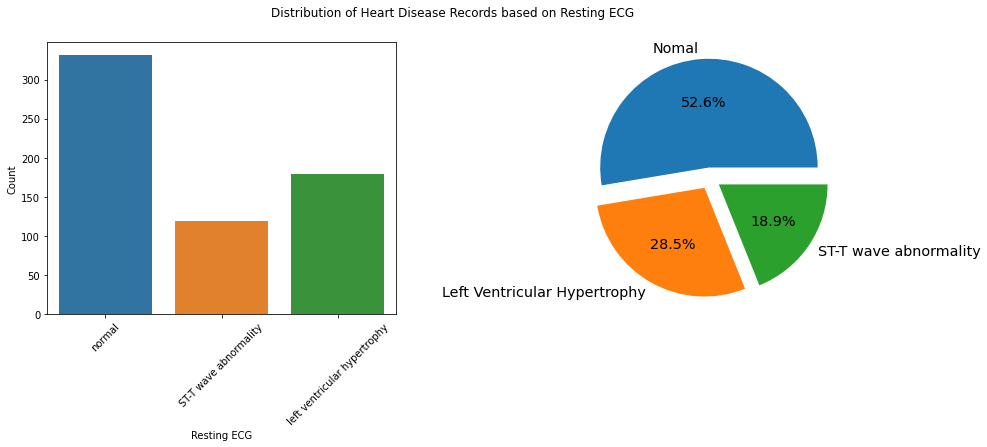

In [21]:
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)

sns.countplot(x = heart_disease["resting ecg"])
plt.xlabel("Resting ECG")
plt.xticks(rotation = 45)
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = heart_disease["resting ecg"].value_counts(), labels =["Nomal", "Left Ventricular Hypertrophy","ST-T wave abnormality"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Heart Disease Records based on Resting ECG")
plt.show()

## Distribution of Non-Heart Disease Records based on Resting ECG

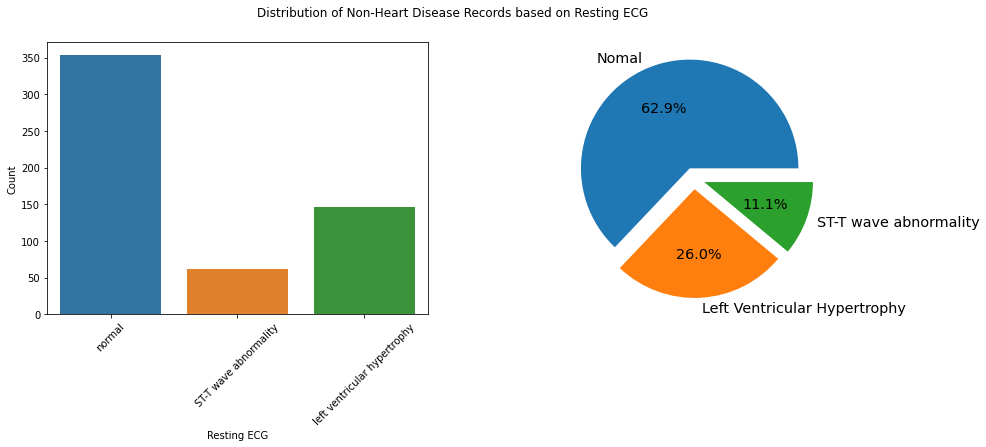

In [22]:
fig = plt.figure(figsize = (15,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

plt.subplot(1,2,1)

sns.countplot(x = no_heart_disease["resting ecg"])
plt.xlabel("Resting ECG")
plt.xticks(rotation = 45)
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = no_heart_disease["resting ecg"].value_counts(), labels =["Nomal", "Left Ventricular Hypertrophy","ST-T wave abnormality"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Non-Heart Disease Records based on Resting ECG")
plt.show()

## Distribution of Heart Disease Records based on Fasting Blood Sugar



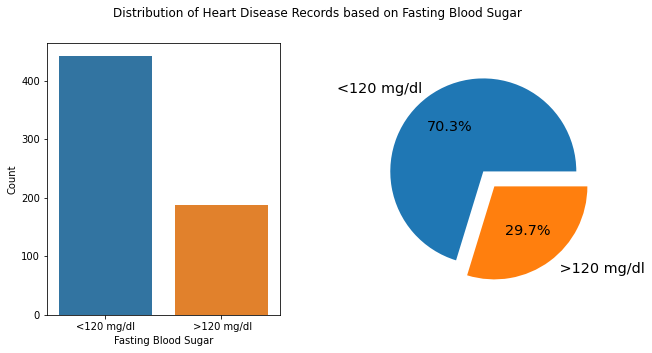

In [23]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)

sns.countplot(x = heart_disease["fasting blood sugar"])
plt.xlabel("Fasting Blood Sugar")
plt.xticks(x = heart_disease["fasting blood sugar"].value_counts())
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = heart_disease["fasting blood sugar"].value_counts(), labels =[ "<120 mg/dl"," >120 mg/dl"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Heart Disease Records based on Fasting Blood Sugar")
plt.show()

## Distribution of Non-Heart Disease Records based on Fasting Blood Sugar

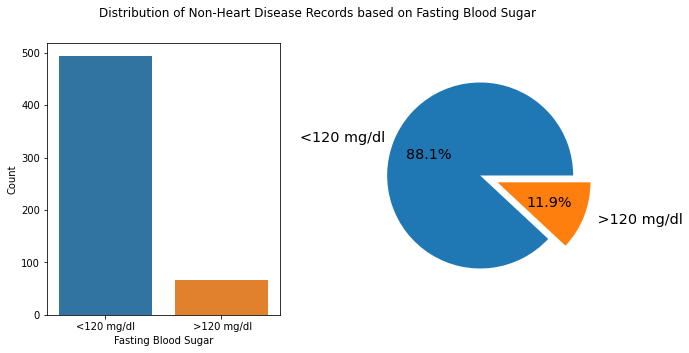

In [24]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)

sns.countplot(x = no_heart_disease["fasting blood sugar"])
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = no_heart_disease["fasting blood sugar"].value_counts(), labels =[ "<120 mg/dl"," >120 mg/dl"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Non-Heart Disease Records based on Fasting Blood Sugar")
plt.show()

In [25]:
heart_disease["ST slope"].value_counts()

flat           459
upsloping      110
downsloping     59
normal           1
Name: ST slope, dtype: int64

## Distribution of Heart Disease Records based on ST-Slope



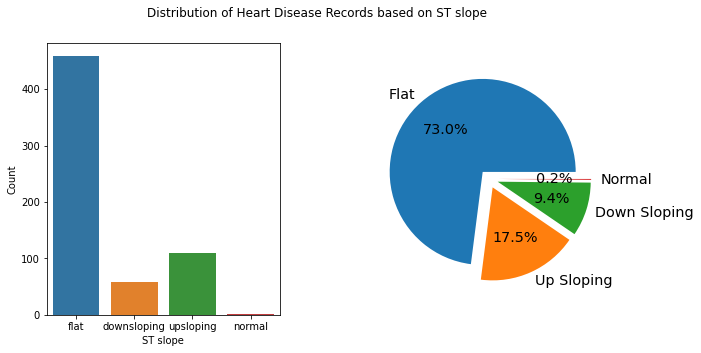

In [26]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)

sns.countplot(x = heart_disease["ST slope"])
plt.xlabel("ST slope")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = heart_disease["ST slope"].value_counts(), labels =["Flat","Up Sloping", "Down Sloping", "Normal"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Heart Disease Records based on ST slope")
plt.show()

## Distribution of Non-Heart Disease Records based on ST Slope

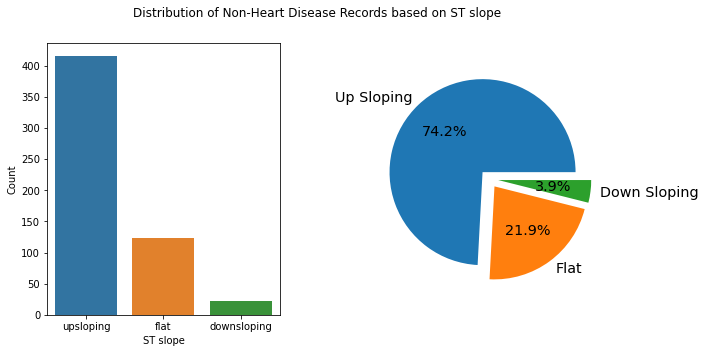

In [27]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)

sns.countplot(x = no_heart_disease["ST slope"])
plt.xlabel("ST slope")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.pie(x = no_heart_disease["ST slope"].value_counts(), labels =["Up Sloping","Flat", "Down Sloping"],autopct='%1.1f%%', startangle=00,explode = [0.1,0.1,0.1],textprops={'size': 'x-large'})

plt.suptitle("Distribution of Non-Heart Disease Records based on ST slope")
plt.show()

#Detecting outliers

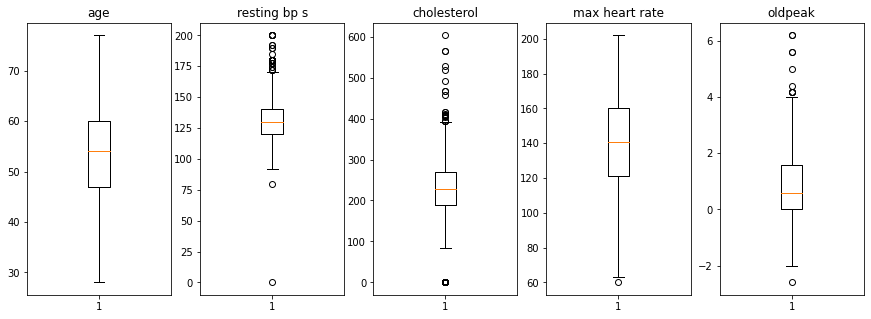

In [28]:
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.boxplot(col[i],data = data)
  plt.title(col[i])

##Removing Outliers

In [29]:
cols = ["resting bp s","cholesterol","oldpeak"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


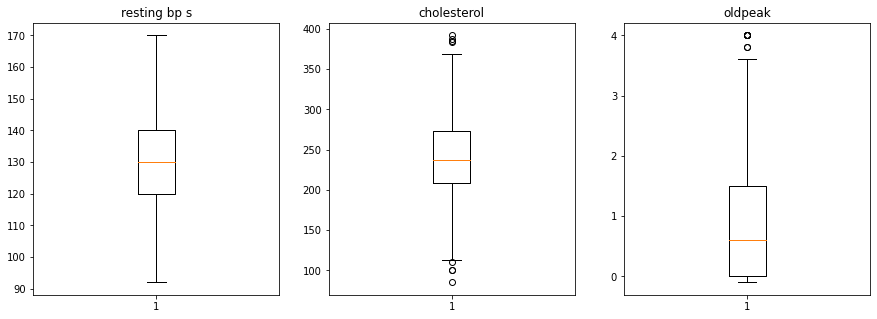

In [30]:
cols = ["resting bp s","cholesterol","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

In [31]:
cols = ["cholesterol","oldpeak"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


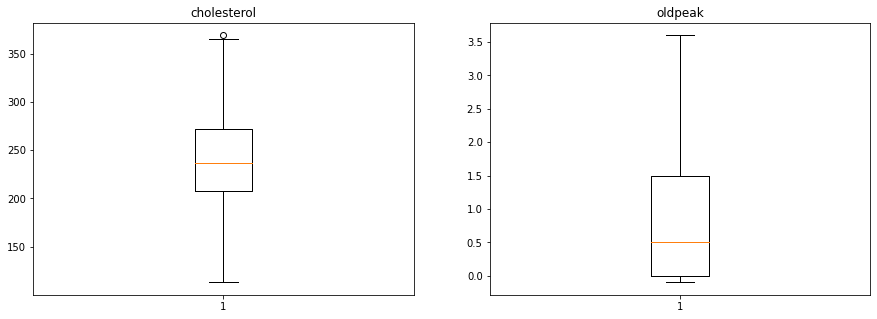

In [32]:
cols = ["cholesterol","oldpeak"]
plt.figure(figsize = (15,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

In [33]:
cols = ["cholesterol"]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


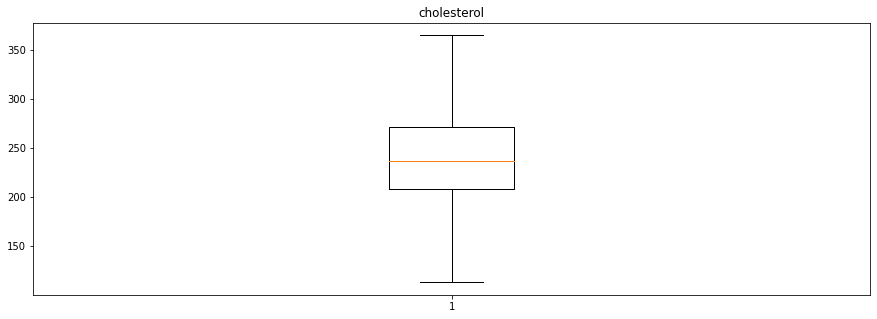

In [34]:
cols = ["cholesterol"]
plt.figure(figsize = (15,5))
for i in range(1):
  plt.subplot(1,1,i+1)
  plt.boxplot(cols[i],data = data)
  plt.title(cols[i])

#Dividing the dataset based on Target Variable After removing outliers

In [35]:
heart_disease = data[data["target"]== "Yes"]

In [36]:
no_heart_disease = data[data["target"] == "No"]

#Data Distribution

##Distribution of Cholesterol

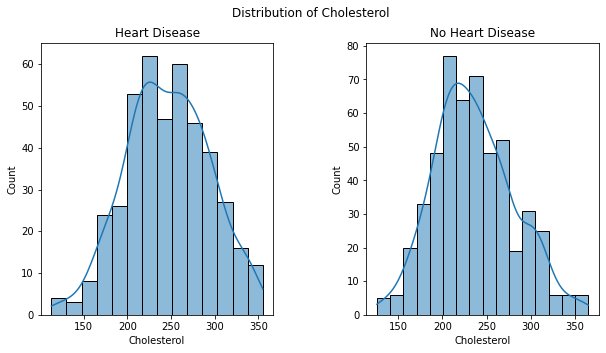

In [37]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)
sns.histplot(data = heart_disease["cholesterol"],kde = True)
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Heart Disease")

plt.subplot(1,2,2)
sns.histplot(data = no_heart_disease["cholesterol"],kde = True)
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("No Heart Disease")

plt.suptitle("Distribution of Cholesterol")
plt.show()

## Distribution of Resting Blood Pressure

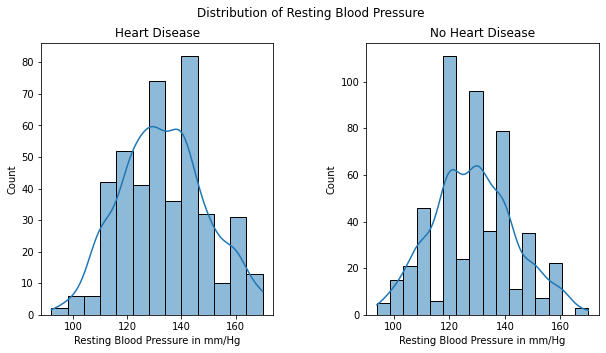

In [38]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)
sns.histplot(data = heart_disease["resting bp s"],kde = True)
plt.xlabel("Resting Blood Pressure in mm/Hg")
plt.ylabel("Count")
plt.title("Heart Disease")

plt.subplot(1,2,2)
sns.histplot(data = no_heart_disease["resting bp s"],kde = True)
plt.xlabel("Resting Blood Pressure in mm/Hg")
plt.ylabel("Count")
plt.title("No Heart Disease")

plt.suptitle("Distribution of Resting Blood Pressure")
plt.show()

## Distribution of Maximum Heart Rate

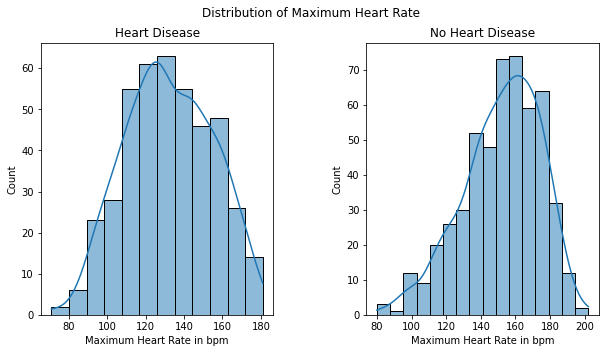

In [39]:
fig = plt.figure(figsize = (10,5))
fig.subplots_adjust(hspace = 0.2, wspace = 0.4)

plt.subplot(1,2,1)
sns.histplot(data = heart_disease["max heart rate"],kde = True)
plt.xlabel("Maximum Heart Rate in bpm")
plt.ylabel("Count")
plt.title("Heart Disease")

plt.subplot(1,2,2)
sns.histplot(data = no_heart_disease["max heart rate"],kde = True)
plt.xlabel("Maximum Heart Rate in bpm")
plt.ylabel("Count")
plt.title("No Heart Disease")

plt.suptitle("Distribution of Maximum Heart Rate")
plt.show()

#Data Preprocessing

In [40]:
data["sex"] = data["sex"].astype(str).replace({"Female":0,"Male":1})
data["fasting blood sugar"] = data["fasting blood sugar"].astype(str).replace({"<120 mg/dl":"0",
                                                                               " >120 mg/dl":"1"})
data["target"] = data["target"].astype(str).replace({"No":0,
                                                     "Yes":1})

In [41]:
data = pd.get_dummies(data, columns = ["chest pain type", "ST slope","resting ecg"])

In [42]:
#data.to_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Preprocessed_data.csv",index = False)